# Figure 2 : Manhattan plots for rare-variant aggregate meta-analysis within ancestries of AD-family and ADSP data with APOE4 adjustment

In [1]:

library('dplyr')
library('ggrepel')
plots <- function(file,model,out){
data <- read.table(gzfile(file),sep='\t', header=T)
# Create a subset of the data with variants with P< 0.05 and arrange by chromosome number
# https://danielroelfs.com/blog/how-i-create-manhattan-plots-using-ggplot/
data$MarkerName<-unlist(lapply(data$MarkerName,function(x){unlist(strsplit(as.character(x),"\\."))[1]}))
sig.dat <- data %>% 
  subset(P.value < 0.05) %>%
  arrange (CHR, .by_group=TRUE)
# Add highlight and annotation information
sig.dat <- sig.dat %>%
mutate(is_highlight=ifelse(P.value<=2.5E-6, "yes", "no")) %>%
mutate(is_annotate=ifelse(P.value<=2.5E-6, "yes", "no"))

# Check the list of chromosomes (make sure the sex chr are at the end of the list)
# Get the cumulative base pair position for each variant
nCHR <- length(unique(sig.dat$CHR))
sig.dat$BPcum <- NA
s <- 0
nbp <- c()
for (i in unique(sig.dat$CHR)){
  nbp[i] <- max(sig.dat[sig.dat$CHR == i,]$POS)
  sig.dat[sig.dat$CHR == i,"BPcum"] <- sig.dat[sig.dat$CHR == i,"POS"] + s
  s <- s + nbp[i]
}

# Calculate the mid point for each chromosome for plotting the x-axis
# Calculate the y-lim 

axis.set <- sig.dat %>% 
  group_by(CHR) %>% 
  summarize(center = (max(BPcum) + min(BPcum)) / 2)
ylim <- 30
sig <- 2.5E-6
# Now time to draw the manhattan plot without filtering the most significant signals
manhplot <- ggplot(sig.dat, aes(x = BPcum, y = -log10(P.value ), 
                             color = as.factor(CHR), size = -log10(P.value))) +
  geom_point(alpha = 0.75) +
  geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") + 
  scale_x_continuous(label = axis.set$CHR, breaks = axis.set$center) +
  scale_y_continuous(expand = c(0, 0), limits=c(NA, ylim)) +
  scale_color_manual(values = c("#1f78b4", "#33a02c", "#e31a1c", "#ff7f00",
                                "#6a3d9a","#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f",
                                "#cab2d6","#ffff99", "#8e0152", "#7fc97f", "#fdc086",
                                "#386cb0","#f0027f", "#bf5b17", "#666666", "#984ea3",
                                "#377eb8", "#4daf4a","#5d5a10")) +
  scale_size_continuous(range = c(0.5,3)) +
  # Add highlighted points and annotation
  # geom_point(data=subset(sig.dat, is_highlight=="yes"), color="orange", alpha=0.75) +
  geom_label_repel(data=subset(sig.dat, is_annotate=="yes"), aes(label=MarkerName), size=4,fontface = "italic") +
  labs(x = "Chromosome", 
       y = "-log10(P.value)") + 
  theme_classic() +
  theme( 
    legend.position = "none",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5)
  )
png(out, width = 6, height = 2, unit='in', res=300)
print(manhplot)
dev.off()
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



## **Panel A: Non-Hispanic Whites meta-analysis of pLOF variants**

In [2]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.txt"
model <- "Model 1"
out <- "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model1_APOE4.png"
plots(file,model,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model1_APOE4.png (121.4 KiB):

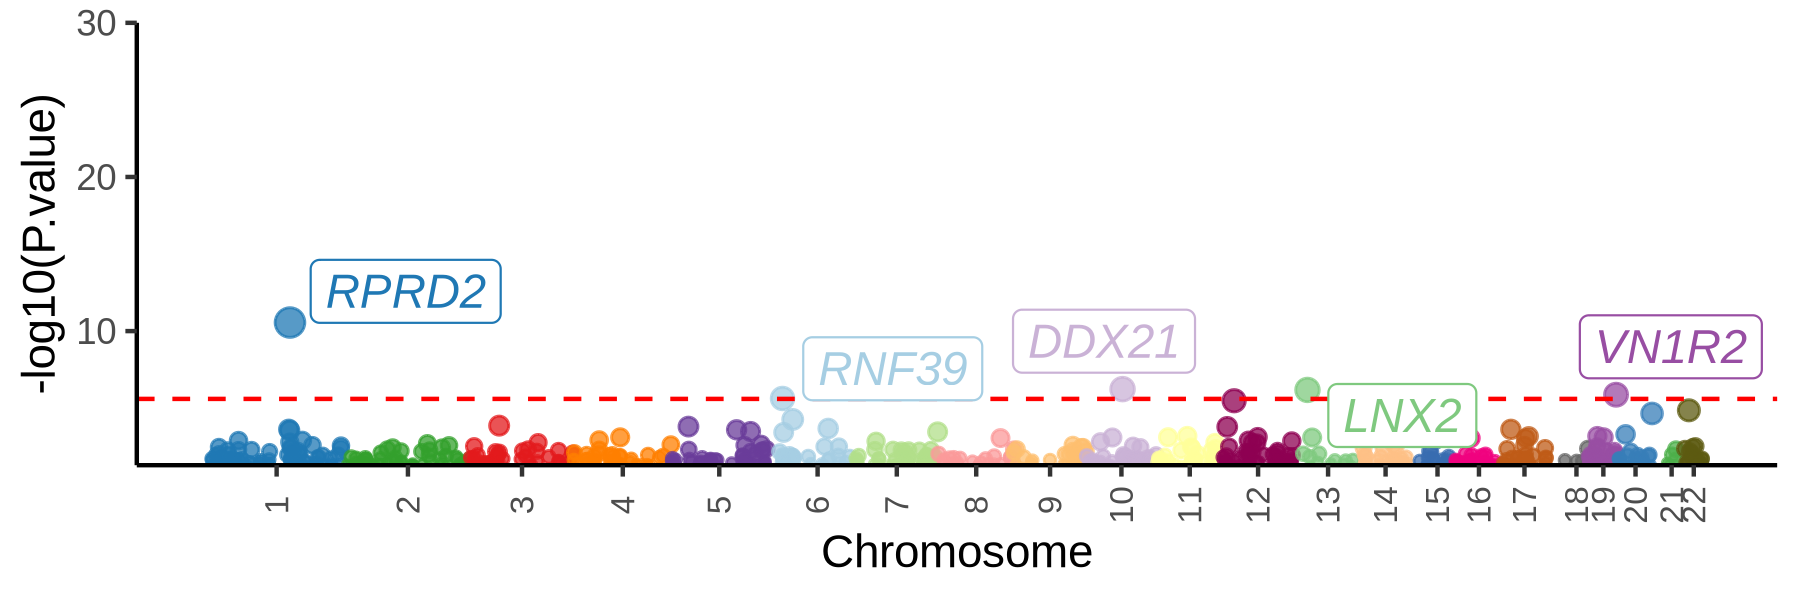

In [3]:
%preview ~/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model1_APOE4.png -n

## **Panel B: Non-Hispanic Whites meta-analysis of pLOF and missense variants**

In [4]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.txt"
model <- "Model 2"
out <- "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model2_APOE4.png"
plots(file,model,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model2_APOE4.png (114.3 KiB):

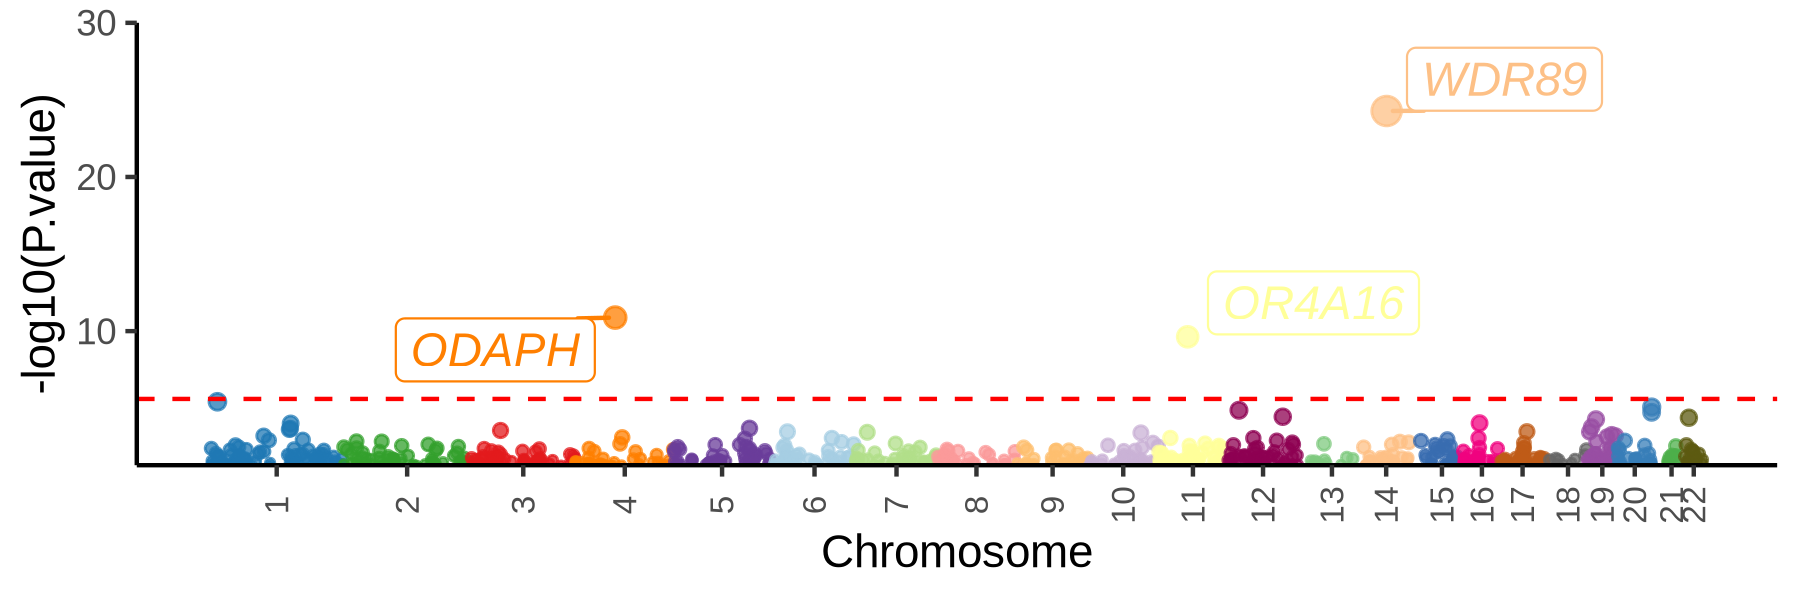

In [5]:
%preview ~/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model2_APOE4.png -n

## **Panel C: Carribean Hispanics meta-analysis of pLOF variants**

In [6]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.txt"
model <- "Model 1"
out <- "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model1_APOE4.png"
plots(file,model,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model1_APOE4.png (88.4 KiB):

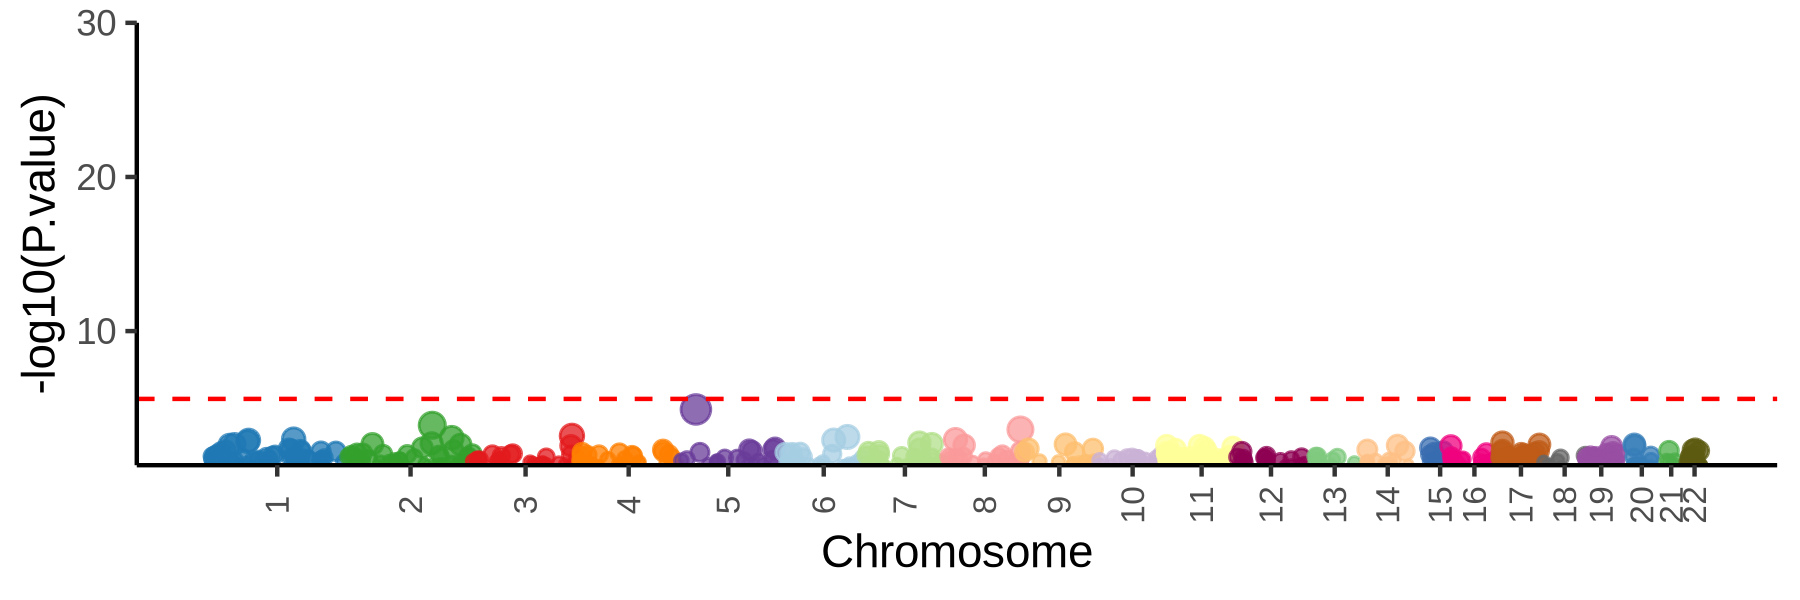

In [7]:
%preview ~/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model1_APOE4.png

## **Panel D: Carribean Hispanics meta-analysis of pLOF and missense variants**

In [8]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.txt"
model <- "Model 2"
out <- "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model2_APOE4.png"
plots(file,model,out)


png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model2_APOE4.png (93.0 KiB):

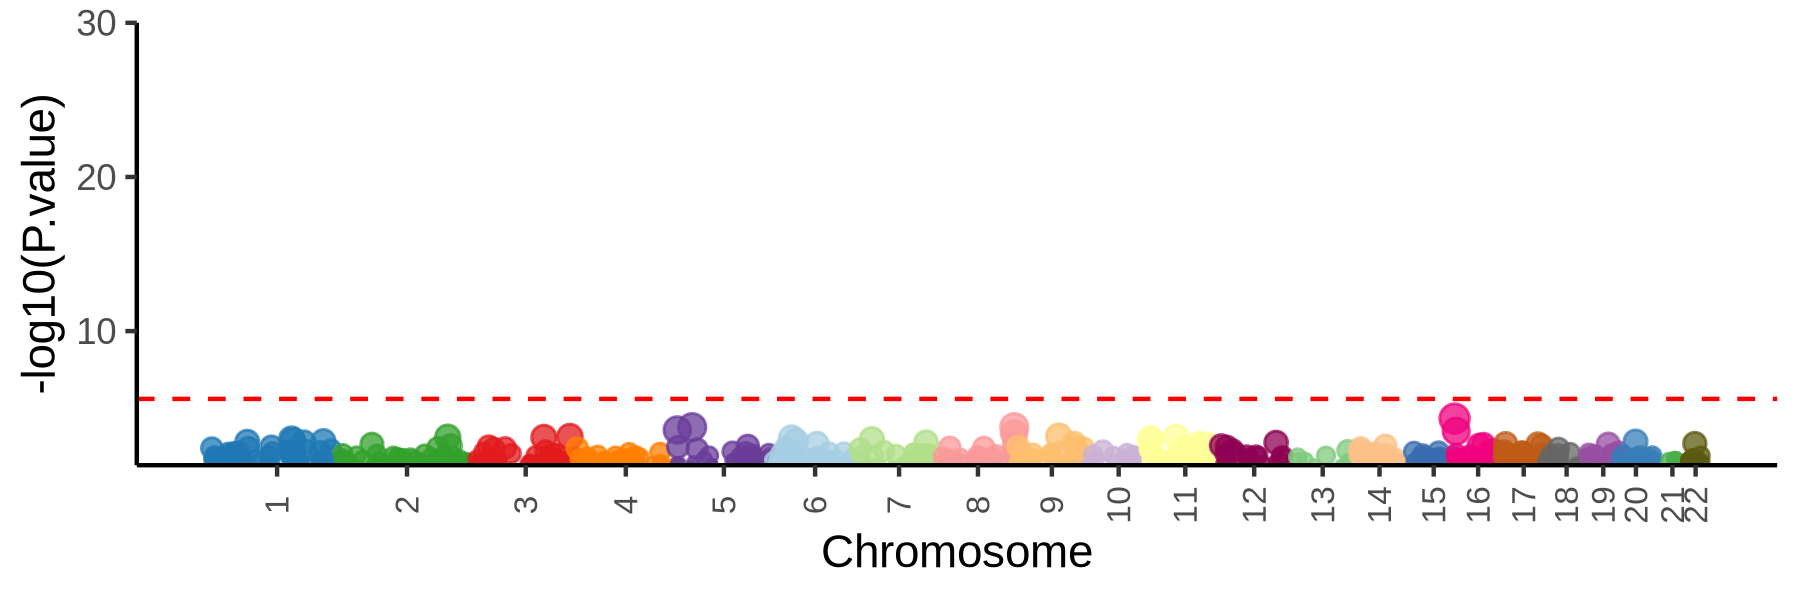

In [9]:
%preview ~/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model2_APOE4.png

## **Panel E: African-Americans meta-analysis of pLOF variants**

In [10]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.txt"
model <- "Model 1"
out <- "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model1_APOE4.png"
plots(file,model,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model1_APOE4.png (93.4 KiB):

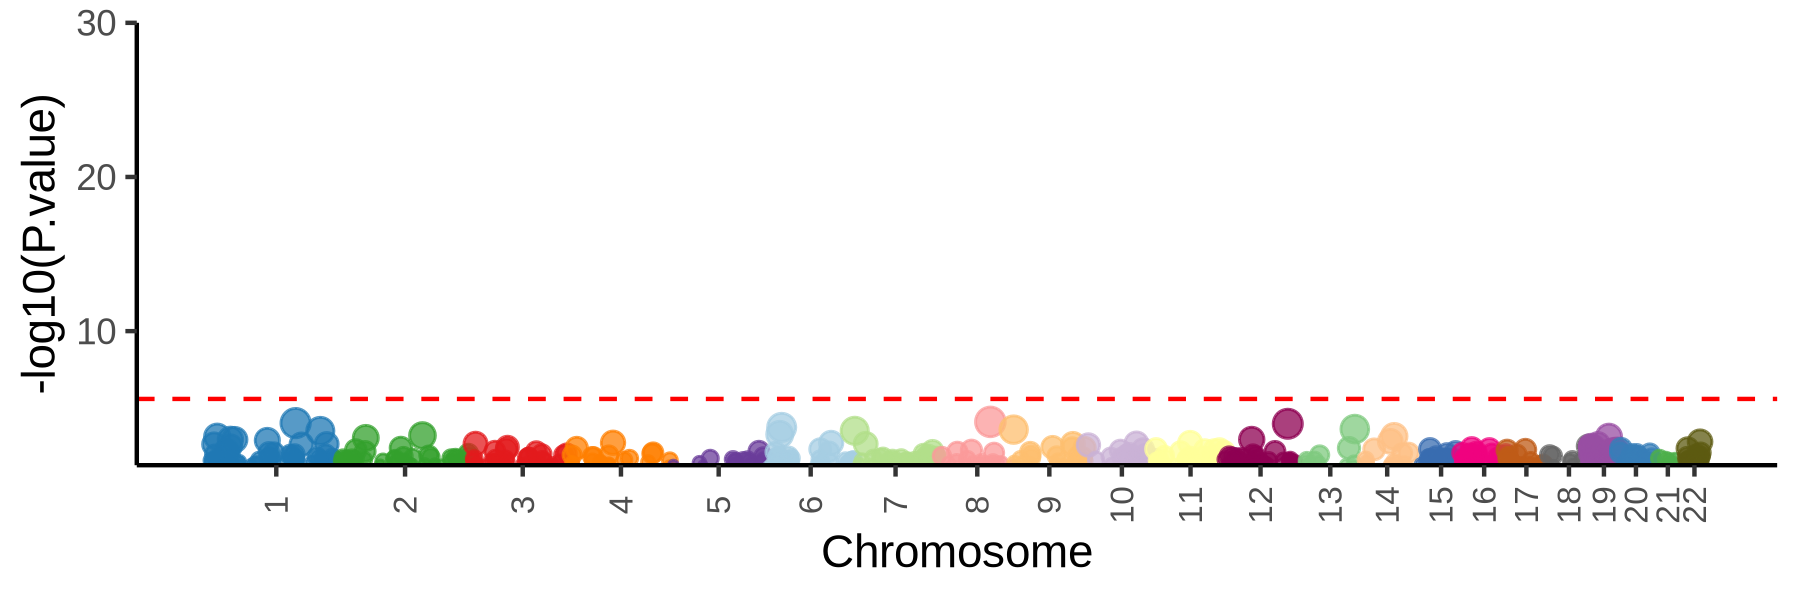

In [11]:
%preview ~/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model1_APOE4.png

## **Panel F: African-Americans meta-analysis of pLOF and missense variants**

In [12]:
file <- "/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.txt"
model <- "Model 2"
out <- "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model2_APOE4.png"
plots(file,model,out)

png 
  2

> /home/bst2126/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model2_APOE4.png (96.4 KiB):

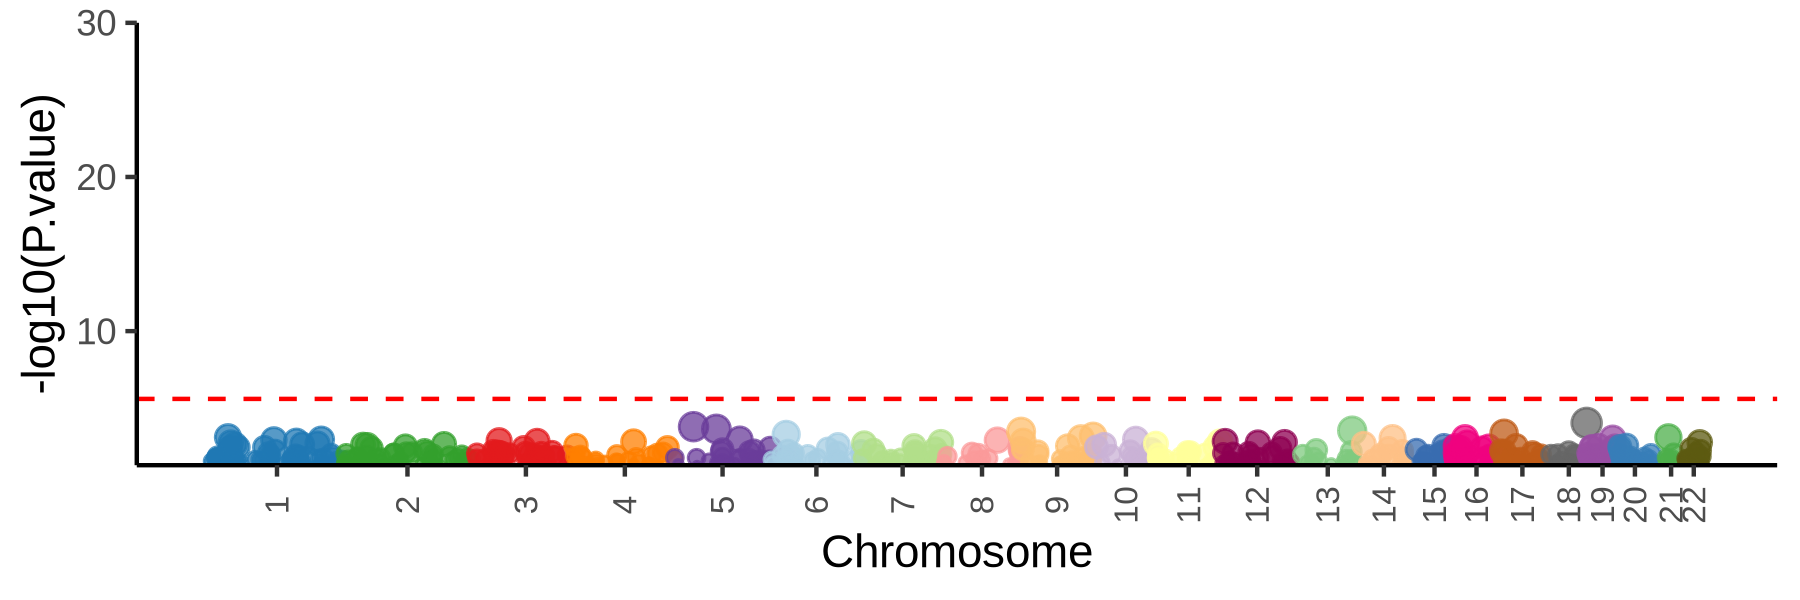

In [13]:
%preview ~/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model2_APOE4.png

# Generate multi-panel figures

In [ ]:
# Multi-panel figure for all AD-family and ADSP across ancestries meta-analysis

In [14]:
# Create panel plots
library(patchwork)
library(png)
library(gridExtra)
library(grid)
library(ggplot2)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Saving 6.67 x 6.67 in image


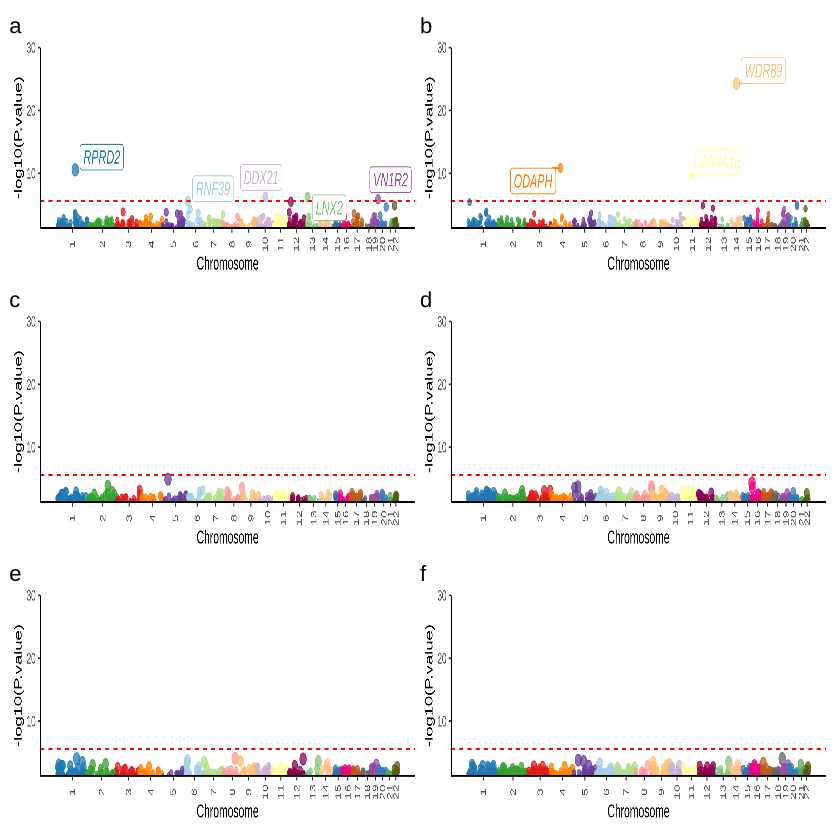

In [15]:
# File paths for your  PNG figures
file_paths <- c("~/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model1_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/European_meta_model2_APOE4.png",
               "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model1_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/Hispanic_meta_model2_APOE4.png",
               "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model1_APOE4.png",
                "~/project_bst/AD_family_Rare_variants/plots/SKAT_O/African_meta_model2_APOE4.png")

# Create a list to store individual plots
plots <- lapply(seq_along(file_paths), function(i) {
  # Read PNG file and create a ggplot
  ggplot() +
    annotation_custom(rasterGrob(readPNG(file_paths[i]), width = 1, height = 1), xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void() +  # Use theme_void to remove axis labels and ticks
    labs(title = letters[i])  # Add labels (A, B, C, etc.)
})

# Combine the individual plots into a single multiple-panel figure
combined_figure_all <- wrap_plots(plots, nrow = 3, ncol = 2)
ggsave("~/project_bst/AD_family_Rare_variants/plots/SKAT_O/within_ancestries_meta_APOE4.png", plot = combined_figure_all)
# Display the combined figure
combined_figure_all